## 1. Import bibliotek

In [1]:
from statistics import correlation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from collections import Counter
from typing import Any
from tabulate import tabulate

import warnings

warnings.filterwarnings('ignore')

from ml_classes import DataLoader, DataPreprocessor, DataAnalyzer

# config wizualizowania danych
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# config dla projektu
CONFIG = {
    'data_path': 'online_shoppers_intention.csv',
    'target_col': 'Revenue',
}

## 2. Pobieranie Danych

In [3]:
loader = DataLoader()

data = loader.load_data(CONFIG['data_path'])

info = loader.get_info()

# info o zbiorze
print(f"\nUżycie pamięci: {info['memory_usage'] / 1024**2:.2f} MB")

print(f"\nBrakujące wartości:")

missing = {k: v for k, v in info['missing_values'].items() if v > 0}
if missing:
    for col, count in missing.items():
        print(f"  - {col}: {count}")
else:
    print("Brak")

# podglad na tabele
print("\nPierwsze 5 wierszy")
data.head()

Data loaded
Data shape: (12330, 18)

Użycie pamięci: 2.72 MB

Brakujące wartości:
Brak

Pierwsze 5 wierszy


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# preprocessing
preprocessor = DataPreprocessor()

# pelny pipeline preprocessingu
X, y = preprocessor.preprocess_pipeline(
    data,
    target_col='Revenue',
    normalize=True,
    fit=True
)

print(f"Kształt X: {X.shape}")
print(f"Kształt y: {y.shape}")
print(f"\nRozkład klas docelowych:")
print(y.value_counts())
print(f"\nProcentowy rozkład:")
print(y.value_counts(normalize=True) * 100)

Kształt X: (12330, 17)
Kształt y: (12330,)

Rozkład klas docelowych:
Revenue
False    10422
True      1908
Name: count, dtype: int64

Procentowy rozkład:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


In [5]:
# analizator danych
analyzer = DataAnalyzer()

# statystyki opisowe
stats = analyzer.descriptive_statistics(data.select_dtypes(include=[np.number]))
pretty_stats = stats.T.reset_index().round(2)

# jednostki dla kazdej kolumny
metadata = {
    'Administrative': 'pages',
    'Administrative_Duration': 'sec',
    'Informational': 'pages',
    'Informational_Duration': 'sec',
    'ProductRelated': 'pages',
    'ProductRelated_Duration': 'sec',
    'BounceRates': '%',
    'ExitRates': '%',
    'PageValues': 'value',
    'SpecialDay': '%',
    'OperatingSystems': 'ID',
    'Browser': 'ID',
    'Region': 'ID',
    'TrafficType': 'ID'
}

# Add metadata column
pretty_stats['Unit'] = pretty_stats['index'].map(metadata).fillna('-')
cols = ['index', 'Unit'] + [col for col in pretty_stats.columns if col not in ['index', 'Unit']]
pretty_stats = pretty_stats[cols]


print("Raport statystyczny:")
print(tabulate(pretty_stats, headers='keys', tablefmt='psql'))

Raport statystyczny:
+----+-------------------------+--------+---------+---------+---------+-------+--------+--------+---------+----------+
|    | index                   | Unit   |   count |    mean |     std |   min |    25% |    50% |     75% |      max |
|----+-------------------------+--------+---------+---------+---------+-------+--------+--------+---------+----------|
|  0 | Administrative          | pages  |   12330 |    2.32 |    3.32 |     0 |   0    |   1    |    4    |    27    |
|  1 | Administrative_Duration | sec    |   12330 |   80.82 |  176.78 |     0 |   0    |   7.5  |   93.26 |  3398.75 |
|  2 | Informational           | pages  |   12330 |    0.5  |    1.27 |     0 |   0    |   0    |    0    |    24    |
|  3 | Informational_Duration  | sec    |   12330 |   34.47 |  140.75 |     0 |   0    |   0    |    0    |  2549.38 |
|  4 | ProductRelated          | pages  |   12330 |   31.73 |   44.48 |     0 |   7    |  18    |   38    |   705    |
|  5 | ProductRelated_Durat

In [6]:
# Analiza korelacji z targetem
print("Korelacje ze zmienną docelową (Revenue)")
#DataAnalyzer koduje kolumny kategoryczne
correlations = analyzer.correlation_analysis(data, target='Revenue')
print(correlations.sort_values(ascending=False))


Korelacje ze zmienną docelową (Revenue)
Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


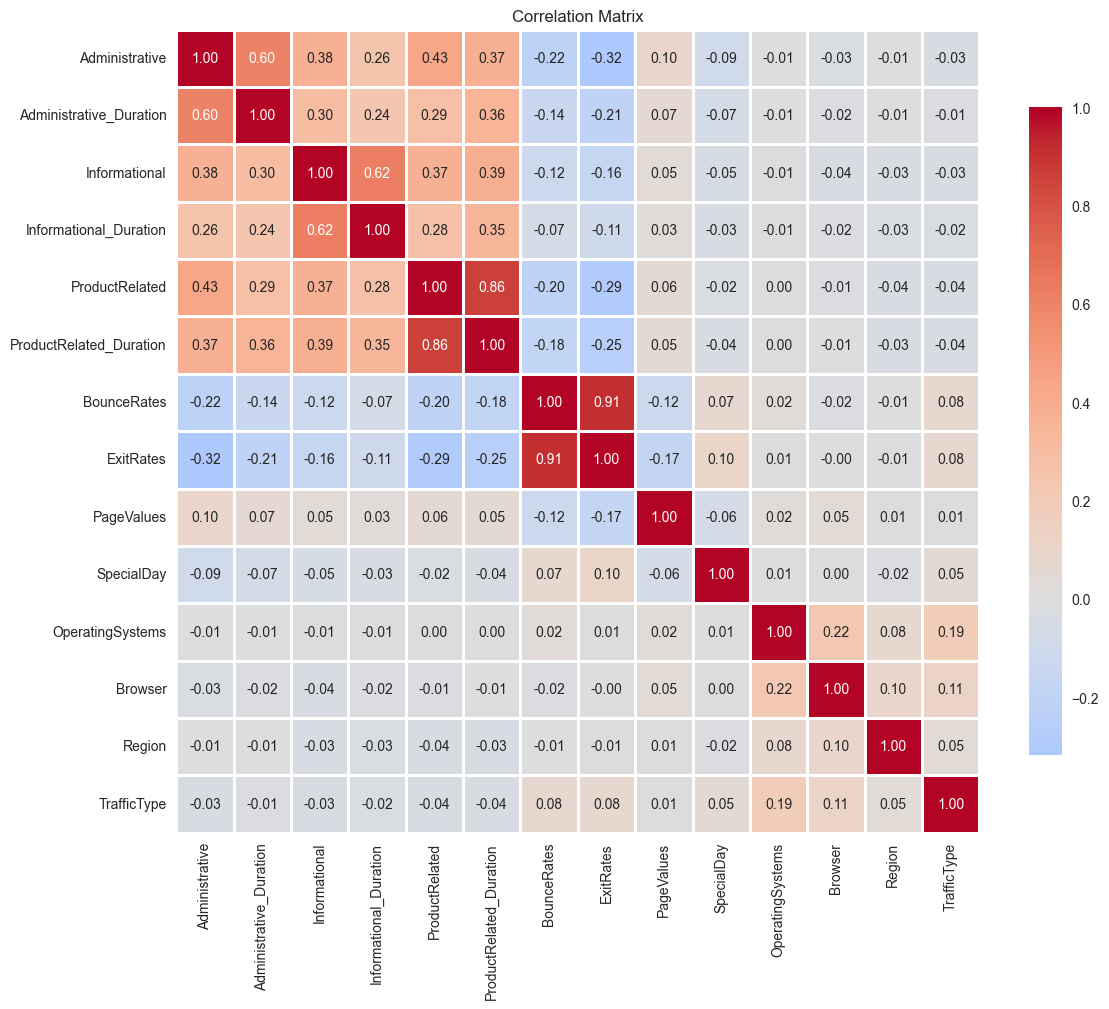

In [7]:
# Macierz korelacji
analyzer.visualise_correlations(data)


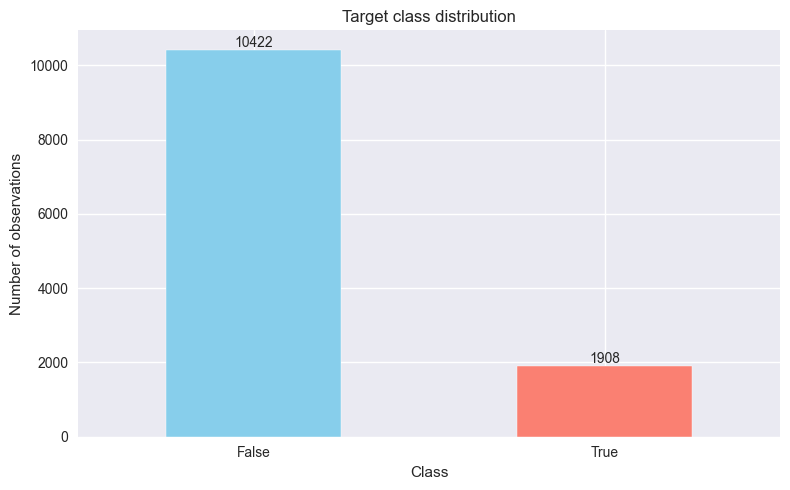


Balans klas: Niezbalansowany


In [8]:
# Analiza balansu klas
balance_info= analyzer.class_balance_analysis(y)
print(f"\nBalans klas: {'Zbalansowany' if balance_info['is_balanced'] else 'Niezbalansowany'}")


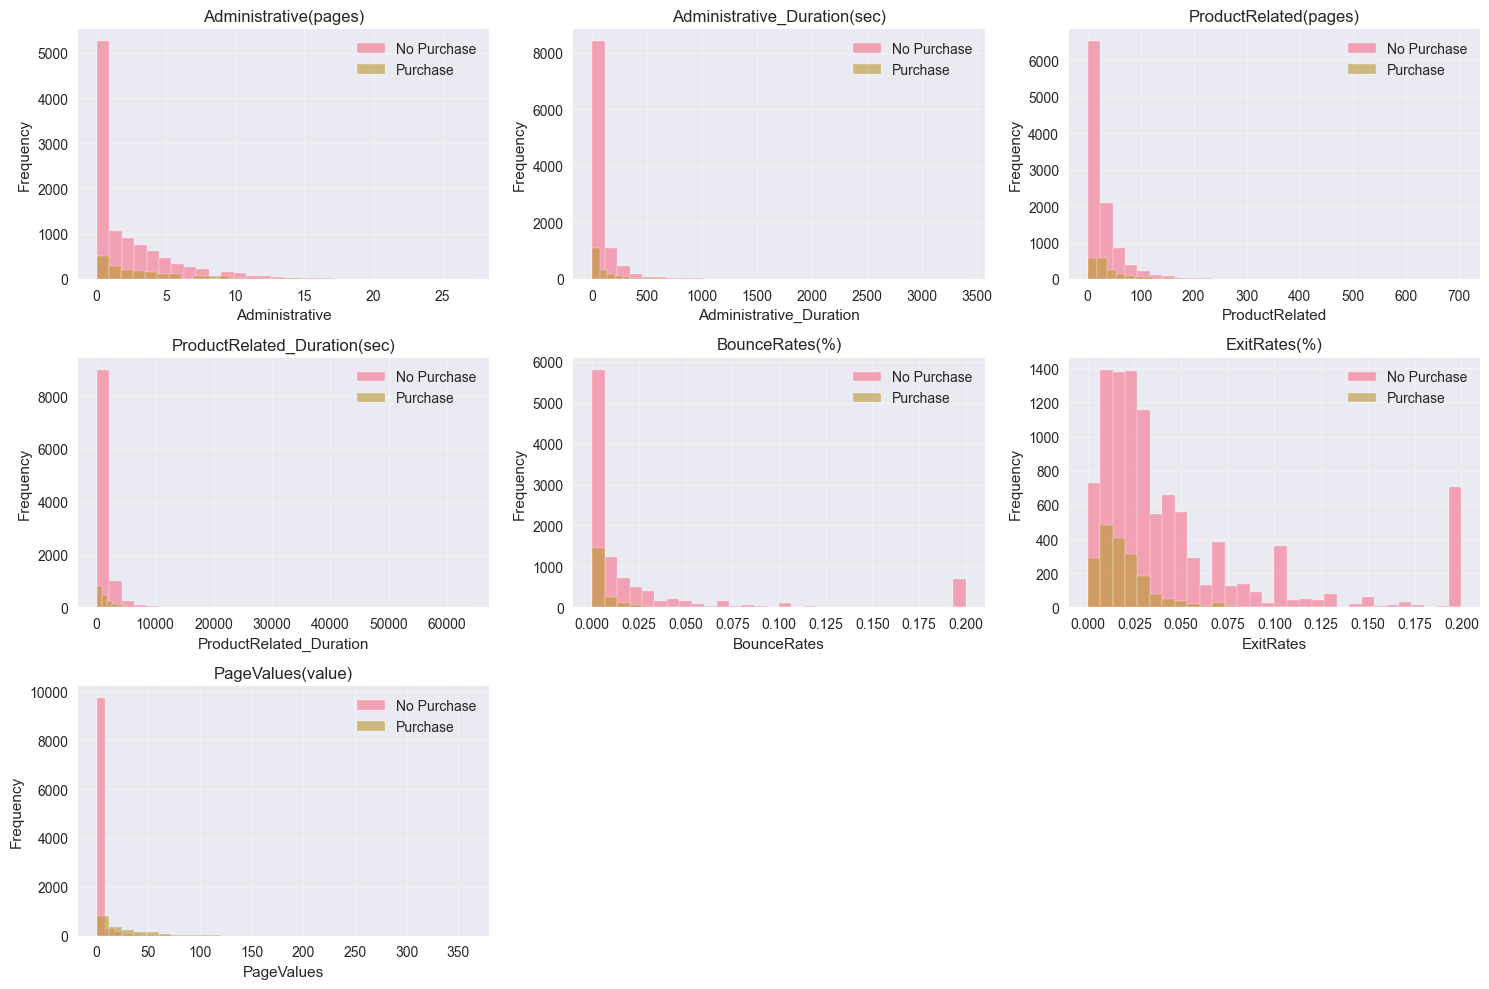

In [9]:
# Rozkłady wybranych zmiennych
numeric_cols = ['Administrative','Administrative_Duration', 'ProductRelated',
                'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues']
# Metadata
metadata = {
    'Administrative': 'pages',
    'Administrative_Duration': 'sec',
    'ProductRelated': 'pages',
    'ProductRelated_Duration': 'sec',
    'BounceRates': '%',
    'ExitRates': '%',
    'PageValues': 'value'
}
analyzer.visualize_distributions(data[numeric_cols + ['Revenue']], columns = numeric_cols, metadata=metadata)
